<a href="https://colab.research.google.com/github/KimYooBin1/daily_coding/blob/main/%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98%20%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(60000, 28, 28 ,1)
x_test=x_test.reshape(10000, 28, 28, 1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train, 10)
y_test=tf.keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5), padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5), padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5), padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
#신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 63s - loss: 0.2046 - accuracy: 0.9366 - val_loss: 0.0655 - val_accuracy: 0.9795 - 63s/epoch - 135ms/step
Epoch 2/30
469/469 - 62s - loss: 0.0575 - accuracy: 0.9823 - val_loss: 0.0463 - val_accuracy: 0.9837 - 62s/epoch - 133ms/step
Epoch 3/30
469/469 - 62s - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0338 - val_accuracy: 0.9893 - 62s/epoch - 133ms/step
Epoch 4/30
469/469 - 63s - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0292 - val_accuracy: 0.9902 - 63s/epoch - 134ms/step
Epoch 5/30
469/469 - 63s - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0295 - val_accuracy: 0.9900 - 63s/epoch - 134ms/step
Epoch 6/30
469/469 - 62s - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0291 - val_accuracy: 0.9913 - 62s/epoch - 133ms/step
Epoch 7/30
469/469 - 63s - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0295 - val_accuracy: 0.9916 - 63s/epoch - 134ms/step
Epoch 8/30
469/469 - 62s - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0309 - val_accuracy: 0.9908 - 62s/epoch - 133

In [ ]:
#신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

정확률은 99.19000267982483


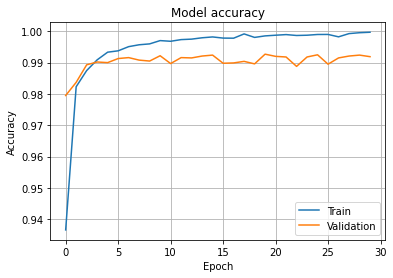

In [ ]:
#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

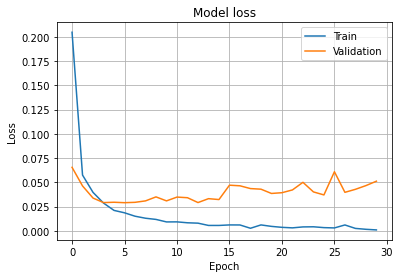

In [ ]:
#손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
#컨볼루션 신경망으로 MNIST 인식
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(60000, 28, 28 ,1)
x_test=x_test.reshape(10000, 28, 28, 1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train, 10)
y_test=tf.keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [ ]:
#신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

Epoch 1/12
469/469 - 130s - loss: 0.2513 - accuracy: 0.9237 - val_loss: 0.0525 - val_accuracy: 0.9830 - 130s/epoch - 278ms/step
Epoch 2/12
469/469 - 128s - loss: 0.0866 - accuracy: 0.9746 - val_loss: 0.0393 - val_accuracy: 0.9871 - 128s/epoch - 274ms/step
Epoch 3/12
469/469 - 129s - loss: 0.0659 - accuracy: 0.9804 - val_loss: 0.0301 - val_accuracy: 0.9893 - 129s/epoch - 274ms/step
Epoch 4/12
469/469 - 129s - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0289 - val_accuracy: 0.9911 - 129s/epoch - 274ms/step
Epoch 5/12
469/469 - 129s - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0302 - val_accuracy: 0.9902 - 129s/epoch - 274ms/step
Epoch 6/12
469/469 - 129s - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0319 - val_accuracy: 0.9897 - 129s/epoch - 274ms/step
Epoch 7/12
469/469 - 128s - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0307 - val_accuracy: 0.9897 - 128s/epoch - 274ms/step
Epoch 8/12
469/469 - 129s - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0281 - val_accuracy: 0.9911 - 

In [ ]:
#신경망 모델 정확률 평가
res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

정확률은 99.22999739646912


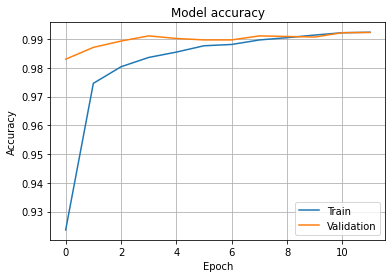

In [ ]:
#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

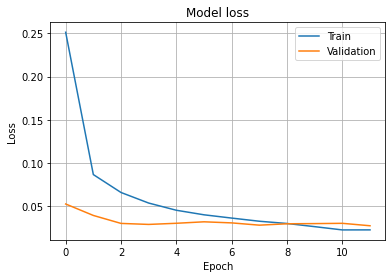

In [ ]:
#손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
#컨볼루션 신경망으로 fashion MNIST 인식
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000, 28, 28 ,1)
x_test=x_test.reshape(10000, 28, 28, 1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train, 10)
y_test=tf.keras.utils.to_categorical(y_test, 10)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [ ]:
#신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

Epoch 1/12
469/469 - 133s - loss: 0.5358 - accuracy: 0.8102 - val_loss: 0.3416 - val_accuracy: 0.8754 - 133s/epoch - 283ms/step
Epoch 2/12


KeyboardInterrupt: ignored

In [1]:
#신경망 모델 정확률 평가
res=cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

NameError: ignored

In [ ]:
#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
#손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()